# World Happiness Data Prediction

# Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

# Reading The Dataset

In [53]:
df = pd.read_csv('worldHappiness.csv')
print(df.shape)
df.head()

(158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [54]:
# Summarize our dataset 
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())

Rows     :  158
Columns  :  12

Features : 
 ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

Unique values :  
 Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64


In [55]:
# Checking the datatype
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Checking the categorical Columns

In [56]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("catagorical columns:",cat_col,end =" ")

catagorical columns: ['Country', 'Region'] 

In [57]:
df.apply(lambda x: len(x.unique()))

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

# Checking Null Values

Are There Missing Data? : False
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


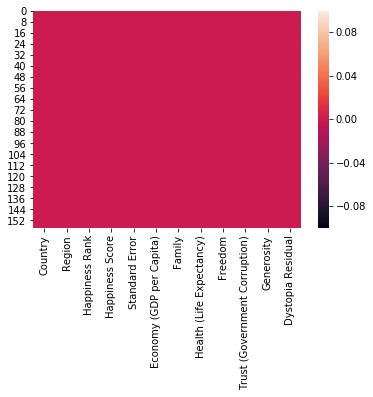

In [58]:
print("Are There Missing Data? :",df.isnull().any().any())
print(df.isnull().sum())
sns.heatmap(df.isnull())

# Exploratory Data Analysis:

Checking the features that are mostly influencing the target Variable.
    
1.Univariate Analysis

2.Multivariate Analysis

3.Bivariate Analysis

       Country  Happiness Score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427


Text(0.5, 1.0, 'Top 5 countries with highest Happiness Score')

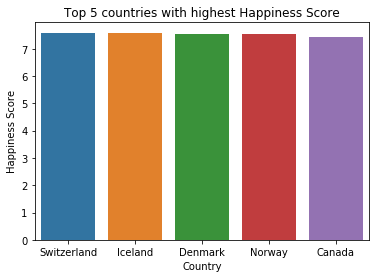

In [59]:
# Checking Top 5 Country with Highest Hapiness Score
top_5 = df.groupby(by ='Country')['Happiness Score'].mean().sort_values(ascending=False).head(5).reset_index()
print(top_5)
# Visualizing by bar plot
sns.barplot(top_5['Country'],top_5['Happiness Score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 countries with highest Happiness Score')

Text(0, 0.5, 'Happiness Score')

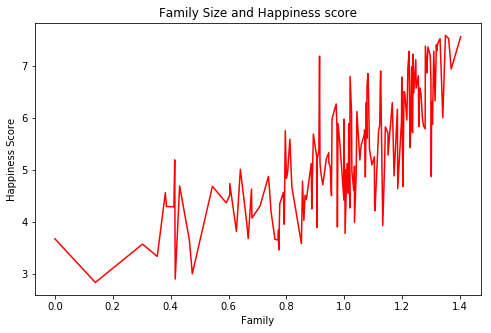

In [78]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Family and Hapiness Score
plt.figure(figsize=(8,5))
sns.lineplot(x="Family", y="Happiness Score", data=df,color='red')
plt.xlabel('Family')
plt.title("Family Size and Happiness score")
plt.ylabel('Happiness Score')

      Country  Economy (GDP per Capita)
0       Qatar                   1.69042
1  Luxembourg                   1.56391
2      Kuwait                   1.55422
3   Singapore                   1.52186
4      Norway                   1.45900


Text(0.5, 1.0, 'Top 5 countries with highest GDP Score')

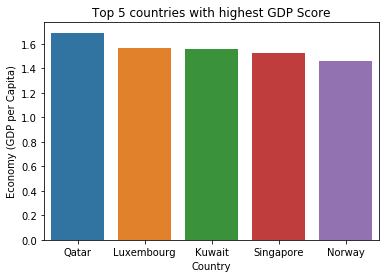

In [61]:
# Checking the highest economy on basic of country
top_5 = df.groupby(by='Country')['Economy (GDP per Capita)'].mean().sort_values(ascending=False).head(5).reset_index()
print(top_5)
# Visualizing by bar plot
sns.barplot(top_5['Country'],top_5['Economy (GDP per Capita)'])
plt.xlabel('Country')
plt.ylabel('Economy (GDP per Capita)')
plt.title('Top 5 countries with highest GDP Score')

       Country  Health (Life Expectancy)
0    Singapore                   1.02525
1    Hong Kong                   1.01328
2        Japan                   0.99111
3  South Korea                   0.96538
4        Spain                   0.95562


Text(0.5, 1.0, 'top 5 countries with highest life expentancy')

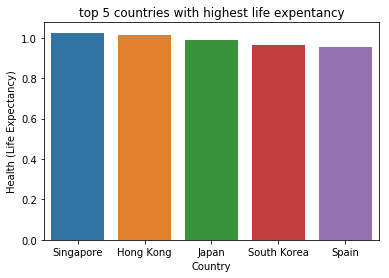

In [12]:
# Checking the top 5 countries with highest life expentancy
top_5 = df.groupby(by='Country')['Health (Life Expectancy)'].mean().sort_values(ascending=False).head(5).reset_index()
print(top_5)
# Visualizing by bar plot
sns.barplot(top_5['Country'],top_5['Health (Life Expectancy)'])
plt.xlabel('Country')
plt.ylabel('Health (Life Expectancy)')
plt.title('top 5 countries with highest life expentancy')

Text(0.5, 1.0, 'Hapiness Score on basis of Region')

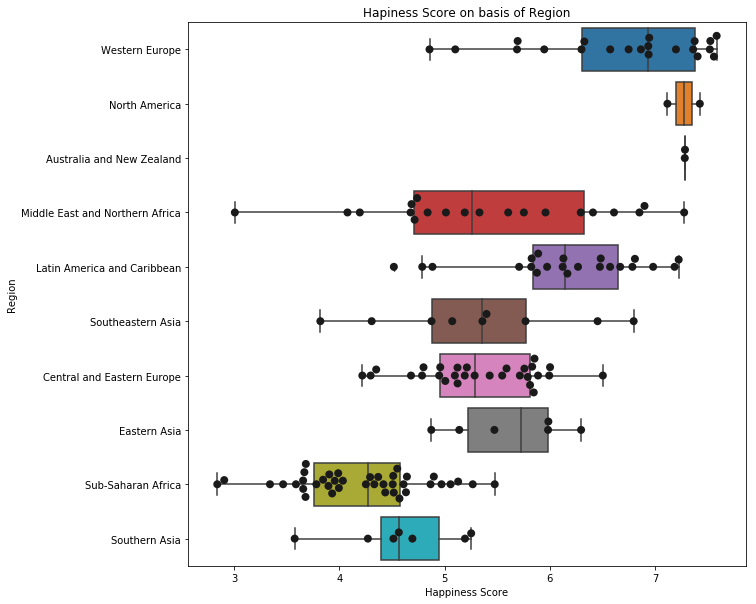

In [13]:
# Checking Hapiness Score on basis of Region:
f,ax=plt.subplots(figsize=(10,10))
sns.boxplot(x=df['Happiness Score'],y=df['Region'],data=df)
sns.swarmplot(x=df['Happiness Score'],y=df['Region'],data=df,color=".10",size=8)
plt.title("Hapiness Score on basis of Region")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

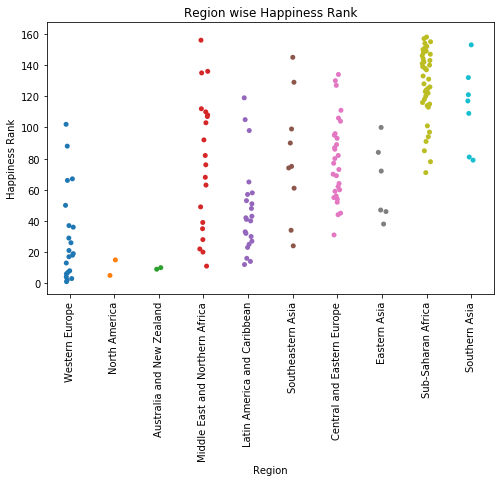

In [14]:
# Region wise Happiness Rank:
plt.figure(figsize=(8,5))
g = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True)
plt.xlabel("Region")
plt.ylabel("Happiness Rank")
plt.title("Region wise Happiness Rank")
plt.xticks(rotation=90)

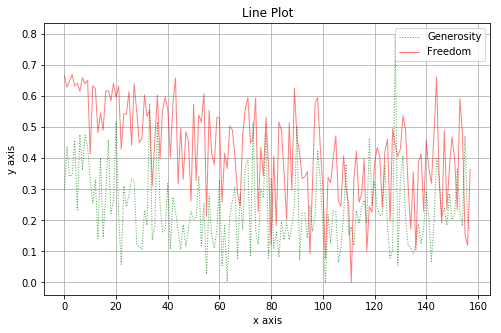

In [15]:
# Checking influence of Genorosity and Freedoom on Hapiness Score
plt.figure(figsize=(8,5))
df.Generosity.plot(kind = 'line', color = 'g',label = 'Generosity',linewidth=1,alpha = 0.7,grid = True,linestyle = ':')
df.Freedom.plot(color = 'r',label = 'Freedom',linewidth=1, alpha = 0.5,grid = True,linestyle = '-')
plt.legend(loc='upper right')     
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')           
plt.show()

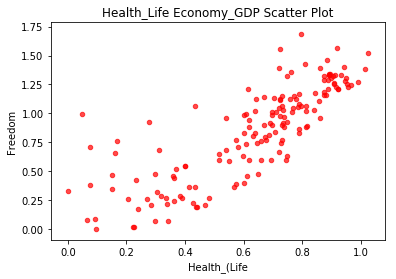

In [16]:
#  checking relationship between Health_Life expentancy with Economy and GDP:
df.plot(kind='scatter', x='Health (Life Expectancy)', y='Economy (GDP per Capita)',alpha = 0.7,color = 'red')
plt.xlabel('Health_(Life')              
plt.ylabel('Freedom')
plt.title('Health_Life Economy_GDP Scatter Plot')            
plt.show()

In [17]:
# Checking the Variations:
data1 = df.loc[:,["Trust (Government Corruption)","Freedom","Health (Life Expectancy)"]]

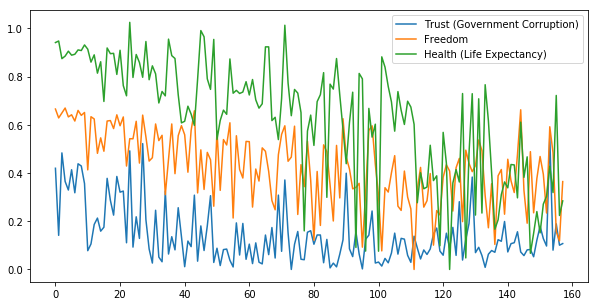

In [18]:
data1.plot(figsize=(10,5))
plt.show()

# Checking for Corelations:

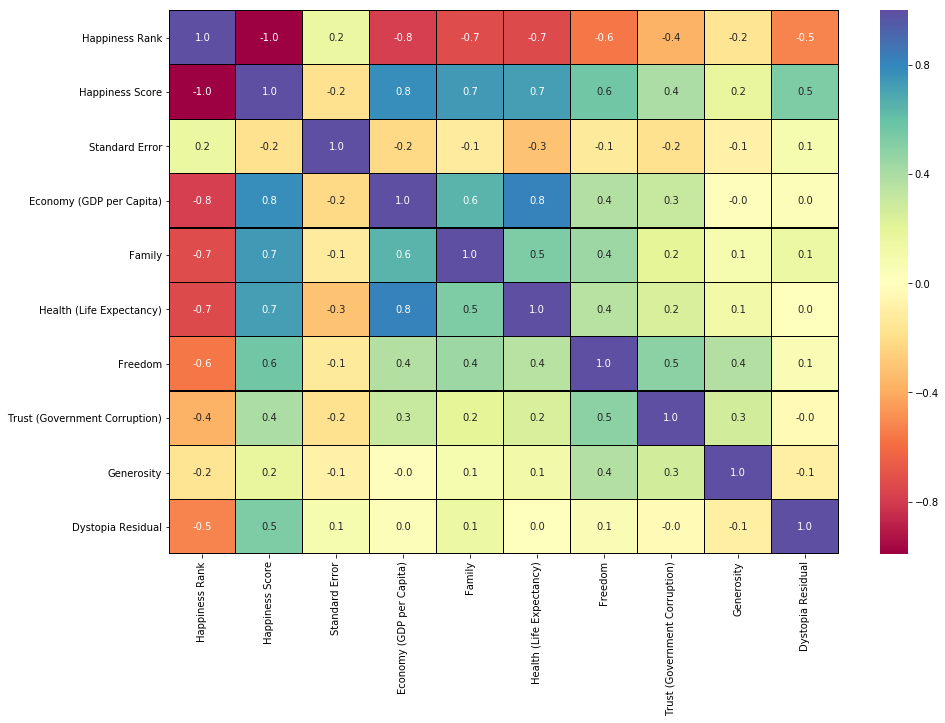

In [19]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

Area under Light Region are highly corelated with each other.

# Checking for Skewness:

In [20]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


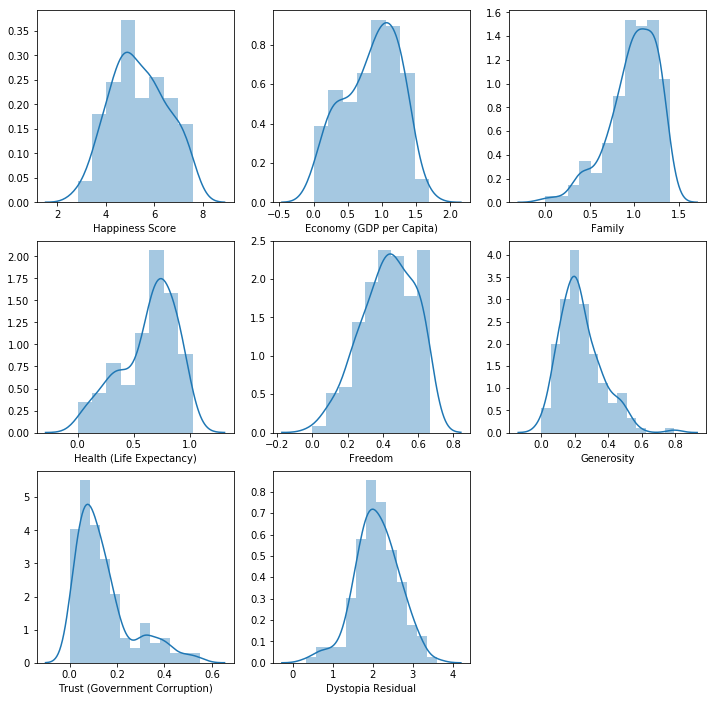

In [21]:
happiness_factors = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                     'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                     'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(df, happiness_factors, (3, 3))

All are columns are nearly normally distributed

# Handling Categorical variable:

In [22]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [23]:
Region = df[["Region"]]
Region = pd.get_dummies(Region, drop_first = True)
Region.head()

,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0


In [24]:
df_final = pd.concat([df,Region], axis = 1)

In [25]:
df_final.drop(columns=['Country','Region'],axis=1,inplace=True)

In [26]:
df.set_index('Happiness Rank',inplace=True)

In [27]:
df_final.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,1,0,0,0,0


In [28]:
df_final.shape

(158, 19)

In [29]:
df_final.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Region_Central and Eastern Europe',
       'Region_Eastern Asia', 'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe'],
      dtype='object')

# Selecting Input and Output Variables.

In [30]:
X = df_final.drop('Happiness Score',axis=1)
y = df_final['Happiness Score']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (158, 18)
shape of y is (158,)


# Using Random Forest Regressor for Prediction:

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Happiness score  X_train dataset: ", X_train.shape)
print("Happiness score  y_train dataset: ", y_train.shape)
print("Happiness score  X_test dataset: ", X_test.shape)
print("Happiness score  y_test dataset: ", y_test.shape)

Happiness score  X_train dataset:  (126, 18)
Happiness score  y_train dataset:  (126,)
Happiness score  X_test dataset:  (32, 18)
Happiness score  y_test dataset:  (32,)


In [32]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = reg_rf.predict(X_test)

In [34]:
reg_rf.score(X_test, y_test)

0.9976201370637156

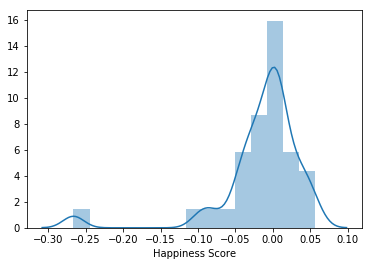

In [35]:
sns.distplot(y_test-y_pred)
plt.show()

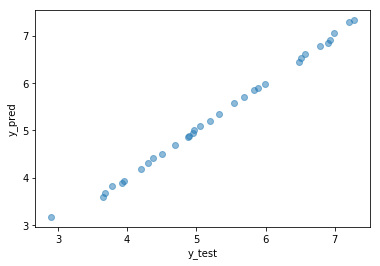

In [36]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.03319687499999924
MSE: 0.003376432137499963
RMSE: 0.05810707476288893


It looks like the Regression has a perfect F1 score on the test set, but keep in mind this is just a single training/test split; we need to confirm this performance holds for other splits. In addition, we need to tune the regularization hyperparameter. Fortunately, there's a way to tackle both at the same time without introducing additional bias

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# Selecting the Best parametre:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [41]:
# Create the random grid for Hyperparametre Tuning:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [42]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [45]:
prediction = rf_random.predict(X_test)

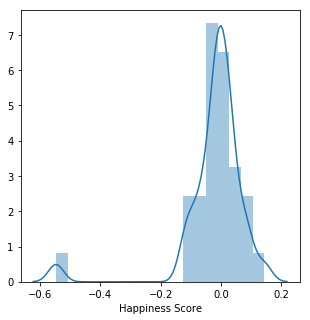

In [46]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction)
plt.show()

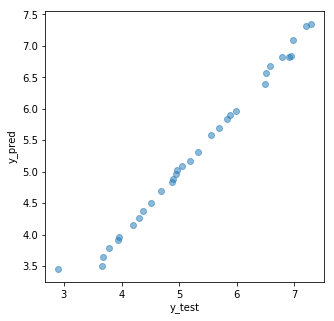

In [47]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.05978397013536803
MSE: 0.012631624174550452
RMSE: 0.11239049859552386


In [49]:
metrics.r2_score(y_test, prediction)

0.9910966567744061

# Saving the model

In [50]:
import joblib
joblib.dump(reg_rf,'reg_rf.obj')
reg_rf_from_joblib = joblib.load('reg_rf.obj')
reg_rf_from_joblib.predict(X_test)

array([4.29938, 5.97896, 4.18783, 3.17134, 5.08296, 6.61482, 4.88939,
       4.85155, 4.94217, 3.89587, 6.85356, 5.84222, 7.06305, 5.5675 ,
       6.78072, 6.53116, 4.50634, 4.69562, 5.00188, 5.70105, 3.5982 ,
       6.90611, 7.29661, 7.31894, 6.44208, 5.18878, 5.88925, 3.93926,
       4.41158, 3.67937, 3.8335 , 5.34539])